<a href="https://colab.research.google.com/github/ming-zhao/AIML_for_Business/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

title: Neural Networks
author: Ming Zhao
date: "{{ datetime.now().strftime('%Y-%m-%d') }}"

In [1]:
# -.-|m { input: false, output: false, output_error: false}
# %load_ext pretty_jupyter

<p><a href="https://colab.research.google.com/github/ming-zhao/AIML_for_Business/blob/main/Neural_Networks.ipynb" target="_blank"><img data-canonical-src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" src="https://camo.githubusercontent.com/84f0493939e0c4de4e6dbe113251b4bfb5353e57134ffd9fcab6b8714514d4d1/68747470733a2f2f636f6c61622e72657365617263682e676f6f676c652e636f6d2f6173736574732f636f6c61622d62616467652e737667"></a></p>

# Neural Networks

Artificial intelligence (AI) has been a subject of intense media hype. Machine learning, deep learning, and AI come up in countless articles, often outside of technology-minded publications.

Artificial intelligence was born in the 1950s, when computer scientists began exploring the possibility of making computers "think." AI is defined as the effort to automate tasks performed by humans. The field encompasses machine learning and deep learning, but also includes approaches that don't involve any learning. Symbolic AI, which involves programmers handcrafting a set of rules to manipulate knowledge, was the dominant paradigm in AI until the late 1980s. However, it proved intractable for solving complex problems, leading to the rise of machine learning as a new approach.

The concept of machine learning is a programming paradigm that allows computers to learn on their own how to perform a task by looking at data, instead of relying on human-crafted rules.
\begin{align}
\left.
\begin{aligned}
\text{Rules} \longrightarrow \\
\text{Data} \longrightarrow
\end{aligned} \right|
&\text{Classical programming} \longrightarrow \text{Answer} \\
\\
\left.
\begin{aligned}
\text{Data} \longrightarrow \\
\text{Answer} \longrightarrow
\end{aligned} \right|
&\text{Machine learning} \longrightarrow \text{Rules}
\end{align}

Unlike classical programming, where humans input rules and data, and out come answers, machine learning systems are trained by presenting them with many examples relevant to a task, allowing them to find statistical structure in the data and eventually come up with rules for automating the task. Machine learning has become the most popular and successful subfield of AI, driven by faster hardware and larger datasets.

Deep learning is a subfield of machine learning that involves learning successive layers of increasingly meaningful representations from data. It often involves lots of (tens or hundreds) of layers of representations learned automatically from training data via models called **neural networks**. The deep in deep learning isn't a reference to any kind of deeper understanding achieved by the approach; rather, it stands for this idea of successive layers of representations.

Deep learning is a complex field that requires familiarity with some concepts. Our approach is to build your intuition about these concepts without getting bogged down in overly technical details. This will help you understand the fundamental ideas behind deep learning and how they can be applied to real-world problems.

## Tensor: where it starts

Tensors are fundamental to the data representations for neural networks. Another name for the same concept is multidimensional array. The dimensionality of a tensor coincides with the number of indexes used to refer to scalar values within the tensor.

<center>
<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/Neural_Networks/figures/tensor.png" width="500">
</center>
    
- Scalars: 0 dimensional tensors

- Vectors: 1 dimensional tensors

- Matrix: 2 dimensional tensors

Let's make data tensors more concrete with real-world examples:

- Vector data — 2D tensors of shape (samples, features)

- Timeseries data or sequence data — 3D tensors of shape (samples, timesteps, features)

- Images — 4D tensors of shape (samples, height, width, channels) or (samples, channels, height, width)

- Video — 5D tensors of shape (samples, frames, height, width, channels) or (samples, frames, channels, height, width)

## Layers: the building blocks of deep learning

A layer in a neural network is a collection of nodes or neurons responsible for learning specific features from input data. Each layer takes one or more input tensors and outputs one or more output tensors, forming a hierarchical structure of learned features.

<center>
<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/Neural_Networks/figures/NN_layers.jpg" width="500">
</center>
    
A crucial aspect of each layer is its set of weights ($w_i$ in the simplified representation), which are learned during training and determine the contribution of each input feature to the output. These weights control how much each input feature affects the layer's output and are adjusted during training to improve the model's performance. In summary, a neural network layer is a data-processing module that learns meaningful representations of the input data, which are used to make predictions or classifications.

An example of a simple neural network with one input node, two hidden nodes, and one output node can be seen in the included [Excel file](https://github.com/ming-zhao/ming-zhao.github.io/blob/master/AIML_for_Business/Neural_Networks/data/SimpleNeuralNetwork.xlsx?raw=true).

<center>
<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/Neural_Networks/figures/simpleNN.png" width="700">
</center>
    
By varying the input value, the output value exhibits a non-linearity.

## Activation functions: beyond the linearity

As we have seen, the simplest unit in (deep) neural networks is a linear operation (scaling + offset) followed by an activation function.

<center>
<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/Neural_Networks/figures/activation.jpg" width="700">
</center>
    
where the linear operation is often performed as matrix multiplication.

Activation functions sound complicated, but the most common activation function these days is ReLU, or rectified linear unit. Which again sounds complicated! But all it turns out to be is a function that implements $max(0,x)$, so the result is 0 if the input is negative, or just the input ($x$) if $x$ is positive. The graphs illustrate the shape of some commonly used activation functions and how they transform input values to output values.

<center>
<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/Neural_Networks/figures/activation2.jpg" width="600">
</center>    

Another very important activation function *softmax*, which is a little more complicated mathematically. Basically it produces a set of values between 0 and 1 that adds up to 1 (probabilities!) and weights the values so it exaggerates differences—that is, it produces one result in a vector higher than everything else. It is often used at the end of a classification network to ensure that that network makes a definite prediction about what class it thinks the input belongs to.

Without activation functions, neural network falls back to being a linear model. Since the layers of linear operations is still a linear operation, the absence of activation functions makes the network unable to learn nonlinear relationships between inputs and outputs. The following are true for the activation functions:

- They have at least one sensitive range, where nontrivial changes to the input result in a corresponding nontrivial change to the output. This is needed for training.

- Many of them have an insensitive (or saturated) range, where changes to the input result in little or no change to the  output.

## Loss function and optimizer: less is what we want

A loss function (or cost function) is a function that computes a single numerical value that the learning process will attempt to minimize. The calculation of loss typically involves taking the difference between the desired outputs (labels) for some training samples and the outputs actually produced by the model when fed those samples.

The optimizer determines how the network will be updated based on the loss function. It implements a specific variant of stochastic gradient descent (SGD).

## Models: networks of layers

A deep learning model is typically composed of multiple layers of interconnected nodes or neurons. In a feedforward neural network (FNN), information flows through the layers in one direction only, with no feedback connections between nodes. This makes FNNs suitable for many classification and regression tasks.

In contrast, a recurrent neural network (RNN) has connections between nodes that can form cycles, allowing the network to retain information and have "memories" of previous inputs. This makes RNNs well-suited for processing sequential data, such as text, speech, and time series data. By maintaining a memory of previous inputs, RNNs can capture long-term dependencies and make predictions based on context.

Overall, the architecture of a deep learning model, whether FNN or RNN, is an important factor in determining its suitability for a particular task.

## Anatomy of a neural network

We consider a simple neural network with 3 hidden layers. It learns from scatter input points of a set of functions, such as $x^2$, $\sin(x)$,  $\text{abs}(x)$ and $\text{heaviside}(x)$, and outputs the predicted functions.

<center>
<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/Neural_Networks/figures/hidden.jpg" width="600">
</center>

The following graph displays the features captured by the hidden layers. In other words, the neural network believes that the final curve is a weighted sum of three curves produced by the hidden layers.

32/32 [==============================] - 0s 3ms/step


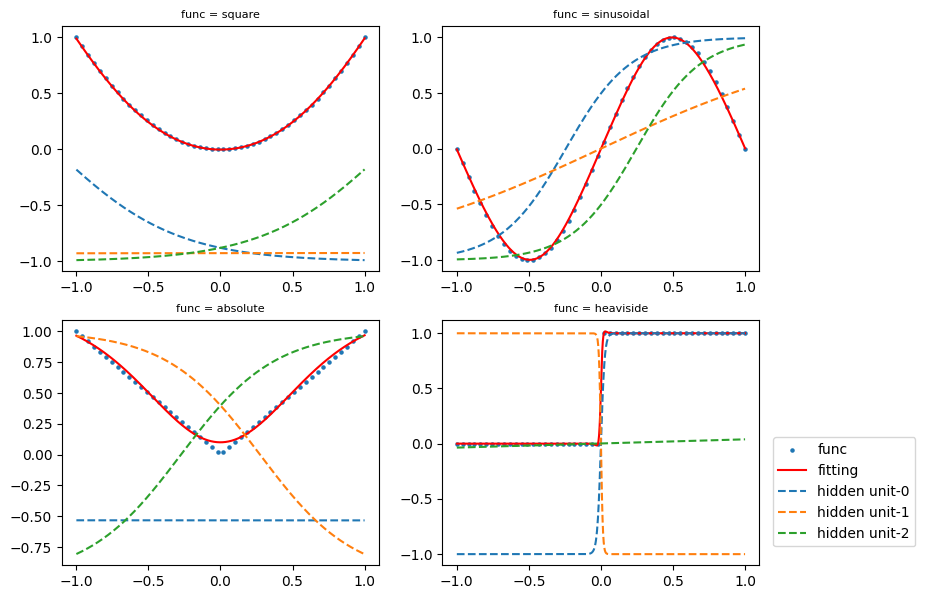

In [3]:
# -.-|m { input: false, output: true, output_error: true}
import numpy as np
import matplotlib.pyplot as plt
from keras import models, layers
from keras.utils.data_utils import get_file

%matplotlib inline

base = ("https://raw.githubusercontent.com/ming-zhao/ming-zhao.github.io"
        "/master/AIML_for_Business/Neural_Networks/")

def sinusoidal(x):
    return np.sin(np.pi * x)

def heaviside(x):
    return 0.5 * (np.sign(x) + 1)

def create_data(func, n=50):
    x = np.linspace(-1, 1, n)[:, None]
    return x, func(x)

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(3, activation='tanh', input_shape=(1,), name='mid_layer'))
    model.add(layers.Dense(1))
    model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mse'])
    model.fit(x_train, y_train, epochs=10000, batch_size=1, verbose=0);
    return model

x_test = np.linspace(-1, 1, 1000)
func_list = [np.square, sinusoidal, np.abs, heaviside]

plt.figure(figsize=(9, 7))
for i, func in enumerate(func_list):
    x_train, y_train = create_data(func)
    # model = build_model()
    model = models.load_model(get_file(origin=base + 'data/func_{}.h5'.format(i)))

    y = model.predict(x_test)
    hidden = models.Model(inputs=model.input,
                          outputs=model.get_layer('mid_layer').output).predict(x_test)

    plt.subplot(2, 2, i+1)
    plt.title("func = {}".format(func.__name__), fontdict = {'fontsize' : 8})
    plt.scatter(x_train, y_train, s=5, label='func')
    plt.plot(x_test, y, color="r", label='fitting')
    for j in range(3):
        plt.plot(x_test, hidden[:,j], linestyle='dashed', label=r"hidden unit-{}".format(j))

plt.legend(bbox_to_anchor=(1.02, 0.55), loc=2, borderaxespad=0.5)
plt.show()

# A Simple Example

The MNIST dataset is a popular benchmark dataset for image classification tasks. It consists of 60,000 training images and 10,000 test images of handwritten digits from 0 to 9. Each image is grayscale and has a resolution of 28 $\times$ 28 pixels.

11490434/11490434 [==============================] - 2s 0us/step
training images:(60000, 28, 28), test images:(10000, 28, 28)


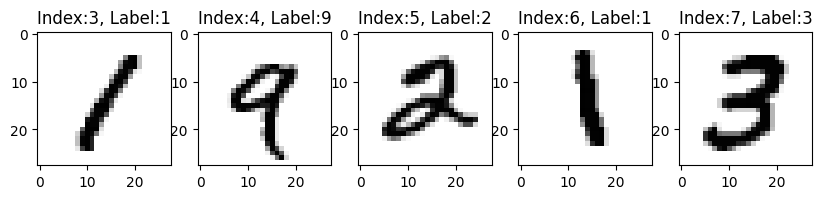

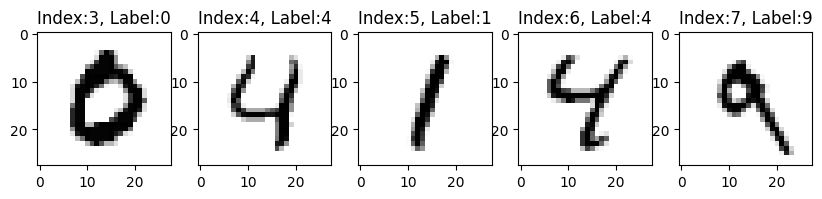

In [4]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('training images:{}, test images:{}'.format(train_images.shape, test_images.shape))

def showimg(data):
    idx  = 3
    span = 5
    if data=='train':
        images = train_images
        labels = train_labels
    if data=='test':
        images = test_images
        labels = test_labels
    plt.figure(figsize=(10,2))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        digit = images[idx+i]
        plt.imshow(digit, cmap=plt.cm.binary)
        plt.title('Index:{}, Label:{}'.format(idx+i, labels[idx+i]), fontsize = 12)
    plt.show()

showimg('train')
showimg('test')

We're using Keras to classify images into their 10 categories (0 through 9).

## Data Preparation
Before training, we reshape and scale the image data, and categorically encode the labels

<center>
<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/Neural_Networks/figures/mnist_1.jpg" width="700">
</center>

which is executed in python code as follows
```python
train_images_reshape = train_images.reshape((60000, 28 * 28))
train_images_reshape = train_images_reshape.astype('float32') / 255
test_images_reshape = test_images.reshape((10000, 28 * 28))
test_images_reshape = test_images_reshape.astype('float32') / 255

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)
```

## Network Architecture

The core building block of neural networks is the *layer*, a data-processing module working as a filter for data. Specifically, layers extract representations out of the data fed into them in a more useful form which is often called features.

Most of deep learning consists of chaining together simple layers that will implement a form of progressive data distillation. A deep-learning model is like a sieve for data processing, made of a succession of increasingly refined data filters the layers.

```python
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
```

Here, our network consists of a sequence of two densely connected (fully connected) layers.

<center>
<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/Neural_Networks/figures/mnist_2.jpg" width="700">
</center>
    
The weights of the first layer can be viewed as 512 28x28 filter images. The first layer compares the input images with these 512 filter images and generates 512 filter scores as output.

The second (and last) layer is a 10-way softmax layer. It aggregates the 512 filter scores into 10 probability scores using the softmax activation function. Each score represents the probability that the current digit image belongs to one of the 10 digit classes.

## Compilation

Before training the network, we need to perform a compilation step by setting up:

- An optimizer: the mechanism to improve its performance on the training data

- A loss function: the measurement of its performance on the training data

- Metrics to monitor during training and testing

```python
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
```

## Training the Network

We train the network as follows
```python
network.fit(train_images_reshape, train_labels_cat, epochs=5, batch_size=128, verbose=1);
```

The network will start to iterate on the training data in mini-batch of 128 samples, 5 times over (each iteration over all the training data is called an *epoch*). At each iteration, the network will compute the gradient of the weights with regard to the loss on the batch, and update the weights accordingly. After these 5 epochs, the network will have performed 2345 = 5 $\times$ ceil(60000 $\div$ 128) gradient updates.

Batch size impacts learning significantly. If your batch size is big enough, this will provide a stable enough estimate of what the gradient of the full dataset would be. By taking samples from your dataset, you estimate the gradient while reducing computational cost significantly.

The lower you go, the less accurate your estimate will be, however in some cases these noisy gradients can actually help escape local minimum. When it is too low, your network weights can just jump around if your data is noisy and it might be unable to learn or it converges very slowly, thus negatively impacting total computation time.

3281424/3281424 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 2ms/step
Test accuracy is 97.91%
Out of 10000 testing images, 209 misclassified images.

plot weights of the first layer as a heatmap


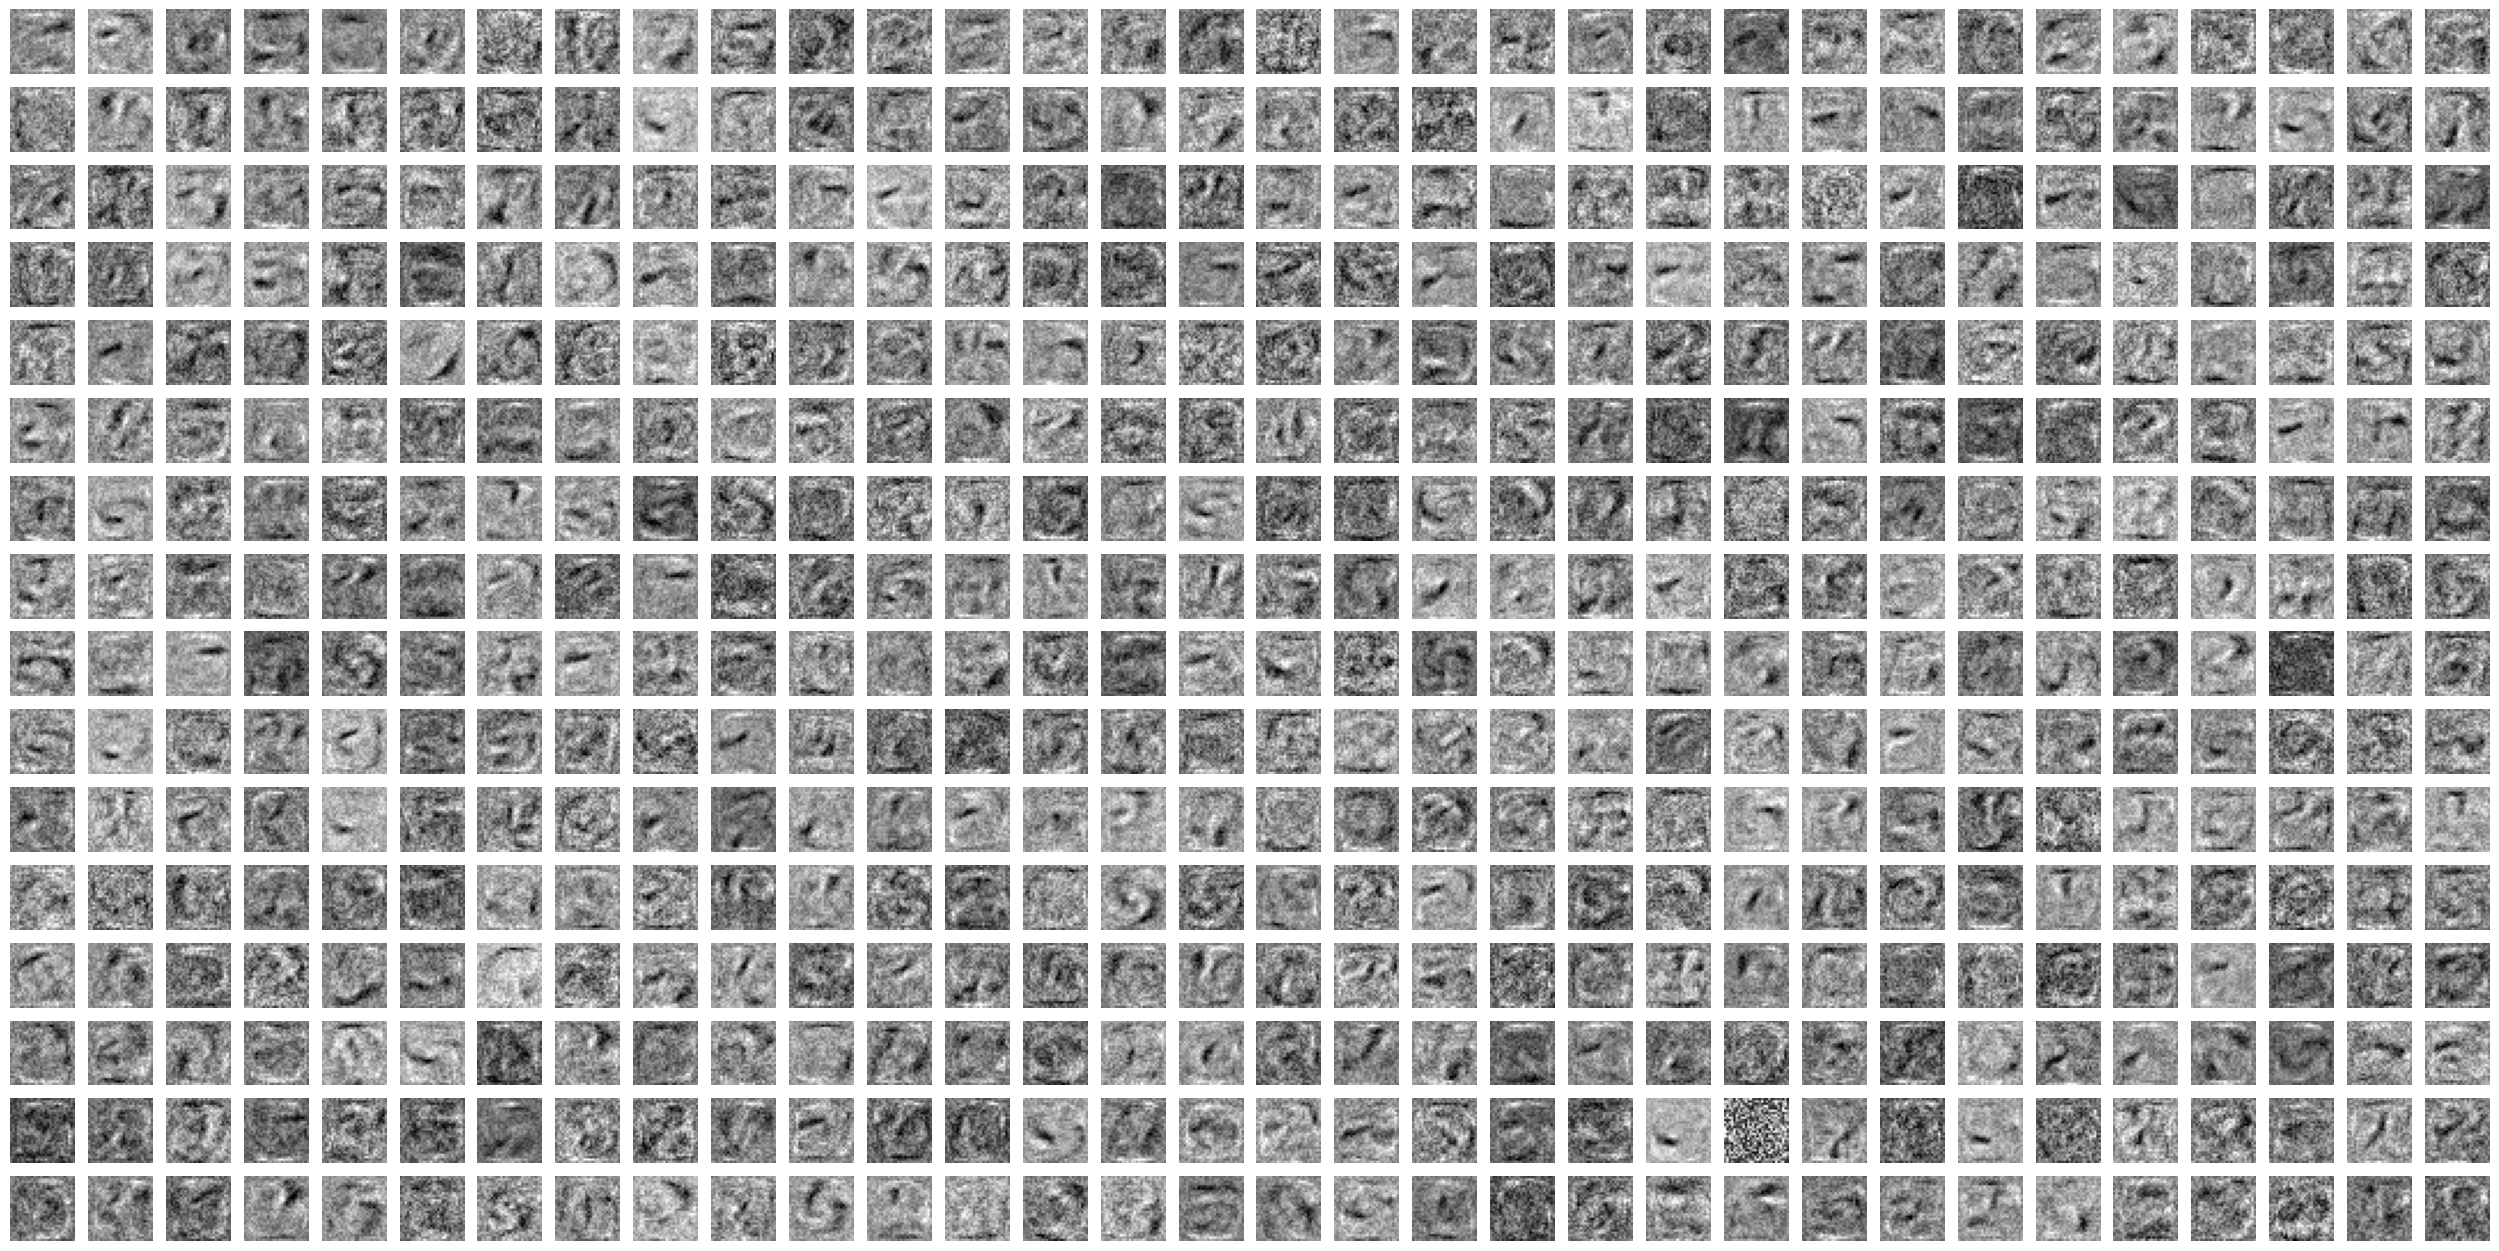

plot aggregated weights of both layers as a heatmap


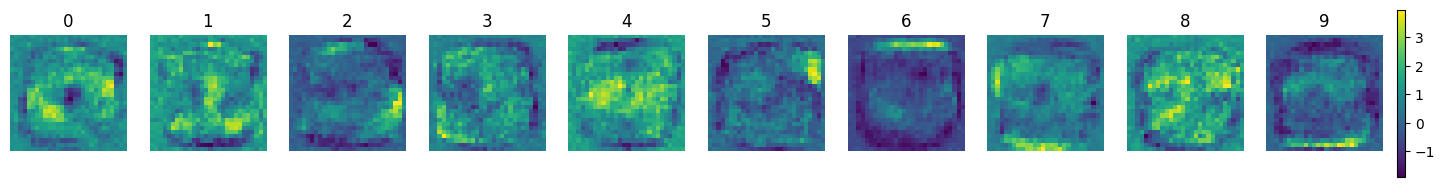

Examples of misclassified images 0-4


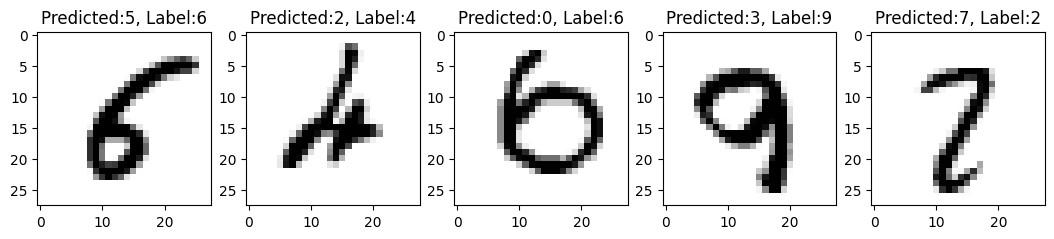

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras import models, layers
from keras import backend as K
from keras.utils import to_categorical
from keras.utils.data_utils import get_file

%matplotlib inline

base = ("https://raw.githubusercontent.com/ming-zhao/ming-zhao.github.io"
        "/master/AIML_for_Business/Neural_Networks/")


def build_model():
    model = models.Sequential()
    model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
    model.fit(train_images_reshape, train_labels_cat, epochs=5, batch_size=128, verbose=1);
    # model.save('mnist_simple.h5')
    return model

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images_reshape = train_images.reshape((60000, 28 * 28))
train_images_reshape = train_images_reshape.astype('float32') / 255
test_images_reshape = test_images.reshape((10000, 28 * 28))
test_images_reshape = test_images_reshape.astype('float32') / 255
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)


# model = build_model()
model = models.load_model(get_file(origin=base + '/data/mnist_simple.h5'))

model.summary()
test_loss, test_acc = model.evaluate(test_images_reshape, test_labels_cat)

predicted = np.argmax(model.predict(test_images_reshape), axis=-1)
result = abs(predicted - test_labels)
misclassified = np.where(result>0)[0]
print('Test accuracy is {}%'.format(round(test_acc*100,2)))
print('Out of 10000 testing images, {} misclassified images.\n'.format(misclassified.shape[0]))

# # # # # # # # # # # # # # # # # # # # # # # #

# Get the weights of all layers
weights = [layer.get_weights() for layer in model.layers]

# Reshape the weights into 28x28 images
weight = np.reshape(weights[0][0], (28, 28, 512))

print('plot weights of the first layer as a heatmap')
fig, axs = plt.subplots(nrows=16, ncols=32, figsize=(32,16))
for i in range(16):
    for j in range(32):
        axs[i,j].imshow(weight[:,:,i*32+j], cmap='gray')
        axs[i,j].axis('off')
plt.show()

print('plot aggregated weights of both layers as a heatmap')
# Get aggregated weights and reshape
weight = (weights[0][0] @ weights[1][0]).reshape(28, 28, -1)
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(18,10))
for i, ax in enumerate(axes):
    ax.set_title(i)
    im = ax.imshow(weight[:,:,i], cmap='viridis')
    ax.axis('off')
fig.colorbar(im, ax=axes, fraction=0.006, pad=0.01)
plt.show()

index = 0
print('Examples of misclassified images {}-{}'.format(index, index+4))
plt.figure(figsize=(13,3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    idx = misclassified[i+index]
    digit = test_images[idx]
    plt.imshow(digit, cmap=plt.cm.binary)
    plt.title('Predicted:{}, Label:{}'.format(predicted[idx], test_labels[idx]), fontsize = 12)
plt.show()

While the aggregated weights plots don't take into account activation functions and bias terms, they do provide some insight into how the neural network operates. For instance, the center of the 0 image displays strongly negative values, indicating that any color in the center of the image is less likely to be classified as 0.

# Local Interpretability

We will begin by working with a specific example aimed at creating a model for breast cancer diagnosis. Throughout this process, we will delve into the dataset, build Deep Neural Networks (DNNs) using PyTorch, and eventually, explore methods for interpreting these models.


## Exploratory Data Analysis



**Prompt**:

> Utilize the breast cancer data in Sklearn to conduct the following analysis:  
1) Provide an explanation of the dataset and display the first few rows of the data using Python code.  
2) Plot the percentage of benign (value 1) and malignant (value 0) cases in Python code. Y-axis shows percentage.  
3) Provide Python code that enables distributional comparison of benign and malignant cases for a specified feature. For instance, if I input "cell radius", the code will generate a plot comparing the cell radius distribution for both benign and malignant cases for features of mean radius and worst radius. Y-axis shows percentage.  
4) show a correlation plot of input features and the target variable

In Step 4), you may change `annot=False` to hide correlations, or use prompt "hide the numbers in the correlation plot" to ask ChatGPT.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

# Load breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target variable to the DataFrame
df['target'] = data.target

# Display the first few rows of the data
df.head()


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

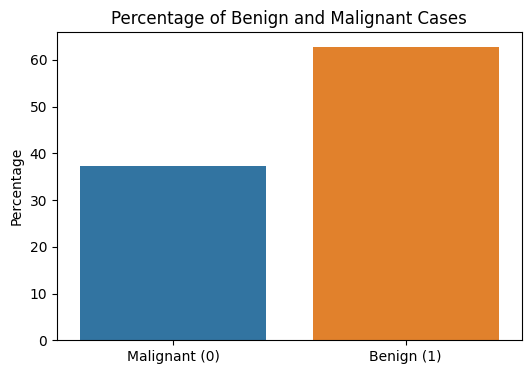

In [7]:
# Calculate the percentage of benign and malignant cases
case_percentage = df['target'].value_counts(normalize=True) * 100

# Plot the percentage
plt.figure(figsize=(6, 4))
sns.barplot(x=case_percentage.index, y=case_percentage.values)
plt.xticks(ticks=[0, 1], labels=['Malignant (0)', 'Benign (1)'])
plt.ylabel('Percentage')
plt.title('Percentage of Benign and Malignant Cases')
plt.show()


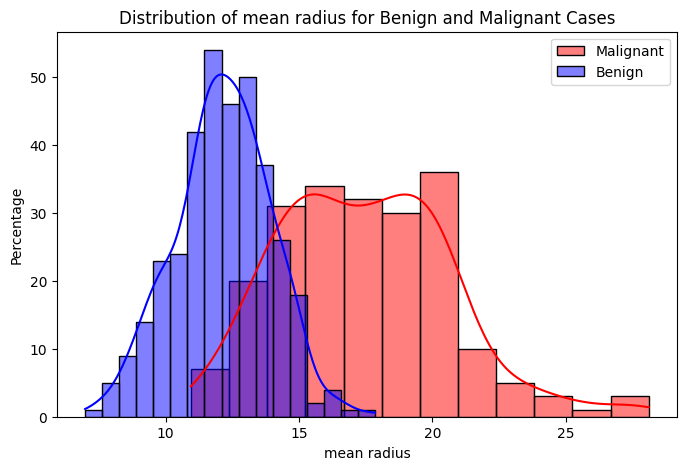

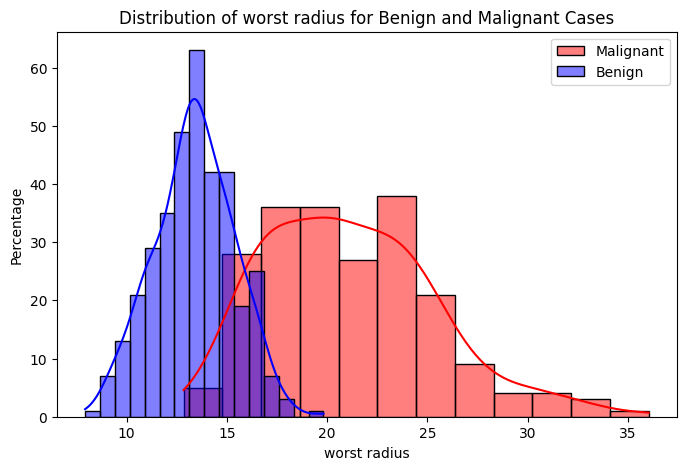

In [8]:
def compare_feature_distribution(feature_name):
    plt.figure(figsize=(8, 5))

    # Select the rows with target 0 (malignant)
    malignant_data = df[df['target'] == 0][feature_name]

    # Select the rows with target 1 (benign)
    benign_data = df[df['target'] == 1][feature_name]

    # Plot the distribution of the specified feature for both benign and malignant cases
    sns.histplot(malignant_data, kde=True, label='Malignant', color='red', alpha=0.5)
    sns.histplot(benign_data, kde=True, label='Benign', color='blue', alpha=0.5)

    plt.xlabel(feature_name)
    plt.ylabel('Percentage')
    plt.title(f'Distribution of {feature_name} for Benign and Malignant Cases')
    plt.legend()
    plt.show()

# Example usage for comparing 'mean radius' and 'worst radius'
compare_feature_distribution('mean radius')
compare_feature_distribution('worst radius')


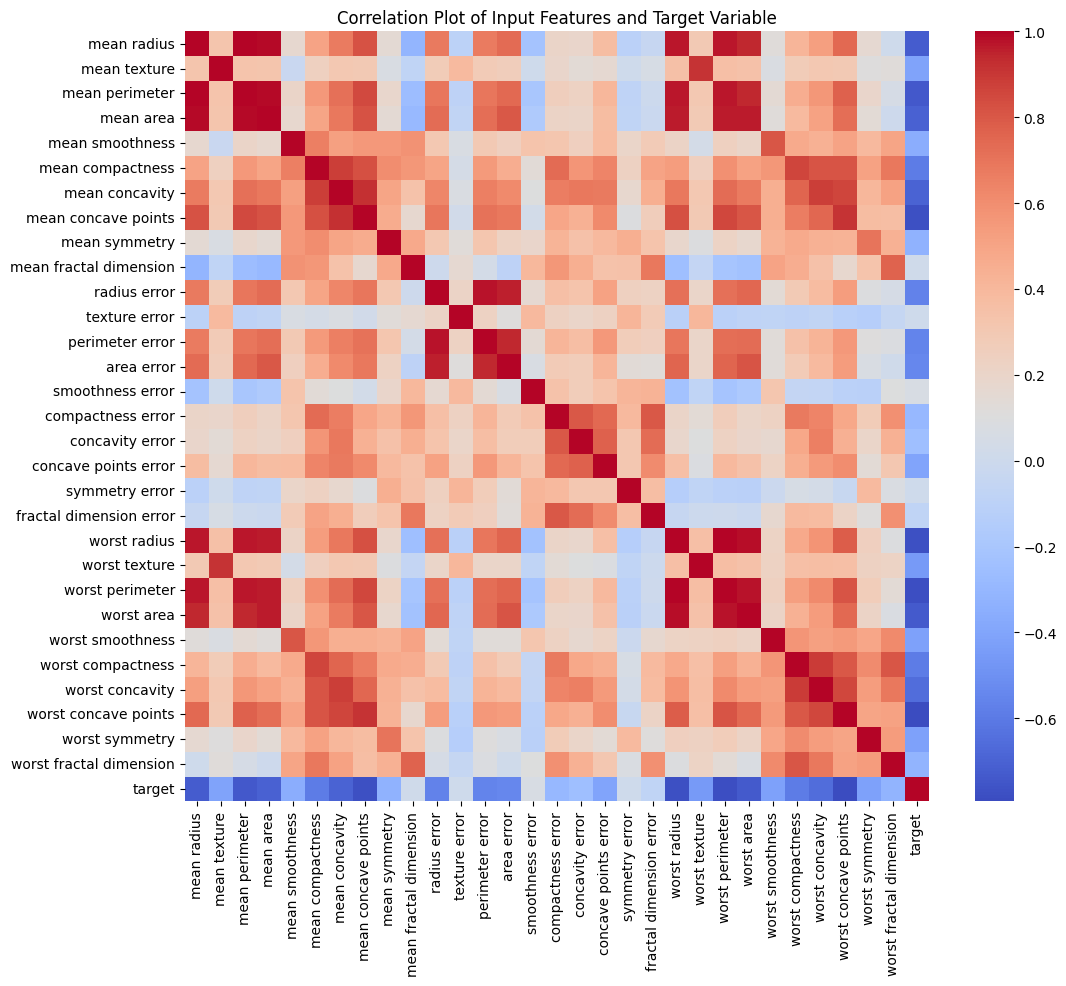

In [9]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot of Input Features and Target Variable')
plt.show()

## Training and Evaluating Neural Network

**Prompt**:
> Use a neural network model as follows:
- Layer 1: Linear layer with 30 input features and 20 output features, followed by the ReLU activation function.
- Layer 2: Linear layer with 20 input features and 10 output features, followed - by the ReLU activation function.
- Layer 3: Linear layer with 10 input features and 5 output features, followed by the ReLU activation function.
- Layer 4: Linear layer with 5 input features and 1 output feature, followed by the Sigmoid activation function.  

> to perform prediction on the breast cancer data in SKLearn. Note that 70% of the data is used for training, 15% for validation, and the remaining 15% as the held-out test set.

ChatGPT may scale the input features. However, for the sake of easier model explanation demonstration, we have turned off the scaler.

In [10]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Load and preprocess the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Normalize the features
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# Convert the target labels to a 2D array (required for PyTorch)
y = y.reshape(-1, 1).astype(np.float32)

# Step 2: Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=24)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=24)

# Step 3: Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Sequential(nn.Linear(30, 20), nn.ReLU())
        self.layer2 = nn.Sequential(nn.Linear(20, 10), nn.ReLU())
        self.layer3 = nn.Sequential(nn.Linear(10, 5), nn.ReLU())
        self.layer4 = nn.Sequential(nn.Linear(5, 1), nn.Sigmoid())

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        return x

# Step 4: Train the model on the training data
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

model = NeuralNetwork()

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 1000
patience = 100
best_val_loss = float('inf')
early_stop_counter = 0

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_pred = model(X_val_tensor)
        val_loss = criterion(val_pred, y_val_tensor).item()

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
    else:
        early_stop_counter += 1

    if early_stop_counter >= patience:
        print(f"Early stopping at epoch {epoch}")
        break

# Step 5: Evaluate the model on the test set
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor)

# Convert predictions to binary (0 or 1) based on the Sigmoid threshold (0.5)
y_pred_binary = (y_pred_test >= 0.5).int()

# Calculate accuracy on the test set
test_accuracy = torch.mean((y_pred_binary == y_test_tensor).float()).item()
print(f"Test Accuracy: {test_accuracy:.4f}")


Early stopping at epoch 499
Test Accuracy: 0.9419


## Interpreting Neural Network

To gain insights into the model's decision-making process, we will showcase several techniques, including Local Interpretable Model-Agnostic Explanations (LIME), SHapley Additive exPlanations (SHAP), and anchors.

Execute the following line to install packages.

In [11]:
!pip install lime shap anchor-exp --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.3/427.3 kB 41.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


**Prompt**:
> Continue the previous code. Find the indices of the first benign case and first malignant case in the text dataset. Interpret the model's predictions with LIME (Local Interpretable Model-agnostic Explanations) to identify the five most important features contributing to the model's decision.

You can adapt this prompt for alternative interpreting methods. I have encountered challenges in making the code provided by ChatGPT function properly.

Top 5 important features and their contributions:
511.00 < worst area <= 683.95: 0.3437
74.69 < mean perimeter <= 85.94: -0.0891
0.01 < concave points error <= 0.01: 0.0381
18.05 < area error <= 24.07: 0.0378
97.38 < worst perimeter <= 123.15: 0.0327


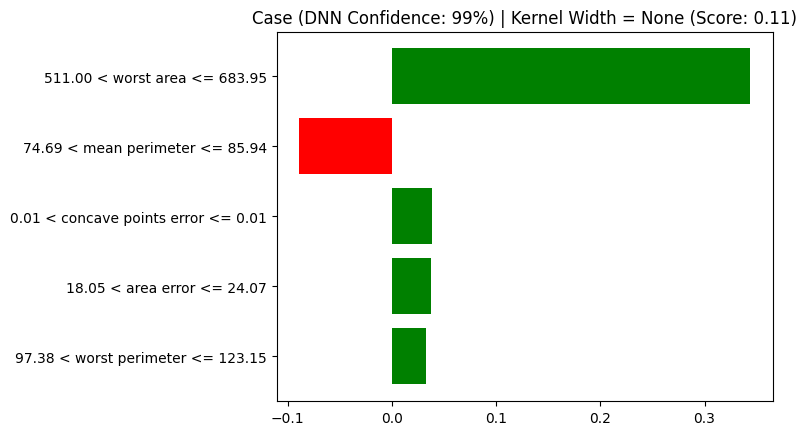

In [12]:
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# Define a custom predict method for the NeuralNetwork class
def prob(data):
    p = model.forward(torch.tensor(data, dtype=torch.float32)).detach().numpy()
    return np.hstack([1 - p, p])

# Get the first benign case and first malignant case from the test set
benign_instance_index = np.where(y_test == 1)[0][0]
malignant_instance_index = np.where(y_test == 0)[0][0]
instance = X_test[benign_instance_index]

# Define the LIME explainer using the custom predict method
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=X_train,
                                                   feature_names=data.feature_names,
                                                   class_names=data.target_names,
                                                   discretize_continuous=True,
                                                   mode='classification')

# Explain the first benign case prediction
exp = explainer.explain_instance(instance, prob, num_features=5)
top_features = exp.as_list()

# Display the top 5 important features and their contributions
print("Top 5 important features and their contributions:")
for feature, contribution in top_features:
    print(f"{feature}: {contribution:.4f}")

# Display the plot
fig = exp.as_pyplot_figure()
plt.title('Case (DNN Confidence: %d%%) | Kernel Width = None (Score: %.2f)' % (prob(instance)[1] * 100, exp.score))
plt.show()

In [13]:
import shap
# print the JS visualization code to the notebook
shap.initjs()

# Define a custom predict method for the NeuralNetwork class
def prob(data):
    return model.forward(torch.tensor(data, dtype=torch.float32)).detach().numpy()

shap_explainer = shap.KernelExplainer(prob, X_train, link="logit")
shap_values = shap_explainer.shap_values(X_test, nsamples=100)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


  0%|          | 0/86 [00:00<?, ?it/s]

In [14]:
benign_instance_index = np.where(y_test == 1)[0][0]
malignant_instance_index = np.where(y_test == 0)[0][0]

index = benign_instance_index
plot = shap.force_plot(shap_explainer.expected_value[0],
                       shap_values[0][index,:],
                       X_test[index,:],
                       feature_names=data['feature_names'],
                       link="logit")
shap.save_html('shap.html', plot, full_html=True)
import IPython
IPython.display.HTML('shap.html')

In [15]:
from anchor import anchor_tabular
instance_to_explain = X_test[0]

# Define a custom predict method for the NeuralNetwork class
def pred(data):
    pred = model.forward(torch.tensor(data, dtype=torch.float32)).detach().numpy().reshape(-1) > 0.5
    return np.array([1 if p == True else 0 for p in pred])

# Use Anchor to explain the first case
anchor_explainer = anchor_tabular.AnchorTabularExplainer(
    data.target_names,
    data.feature_names,
    X_train,
    categorical_names={})
exp = anchor_explainer.explain_instance(X_test[0],
                                        pred,
                                        threshold=0.95)
print('Prediction: ', anchor_explainer.class_names[pred(X_test[0])][0])
print('Anchor: %s' % (' AND '.join(exp.names())))
print('Precision: %.3f' % exp.precision())
print('Coverage: %.3f' % exp.coverage())
exp.save_to_file('anchor.html')
import IPython
IPython.display.HTML('anchor.html')

Prediction:  benign
Anchor: worst area <= 683.95
Precision: 0.995
Coverage: 0.503


# Applications

In this section, we use neural networks to solve basic regression and classification problems.

## Predicting California Housing

**Prompt**:
> Load the California Housing dataset in Sklearn. Display a sample of rows. present fundamental statistics and data visualizations using Python.

> Explain feature names and target of the data.



Sample rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  

Fundamental Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000   

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.


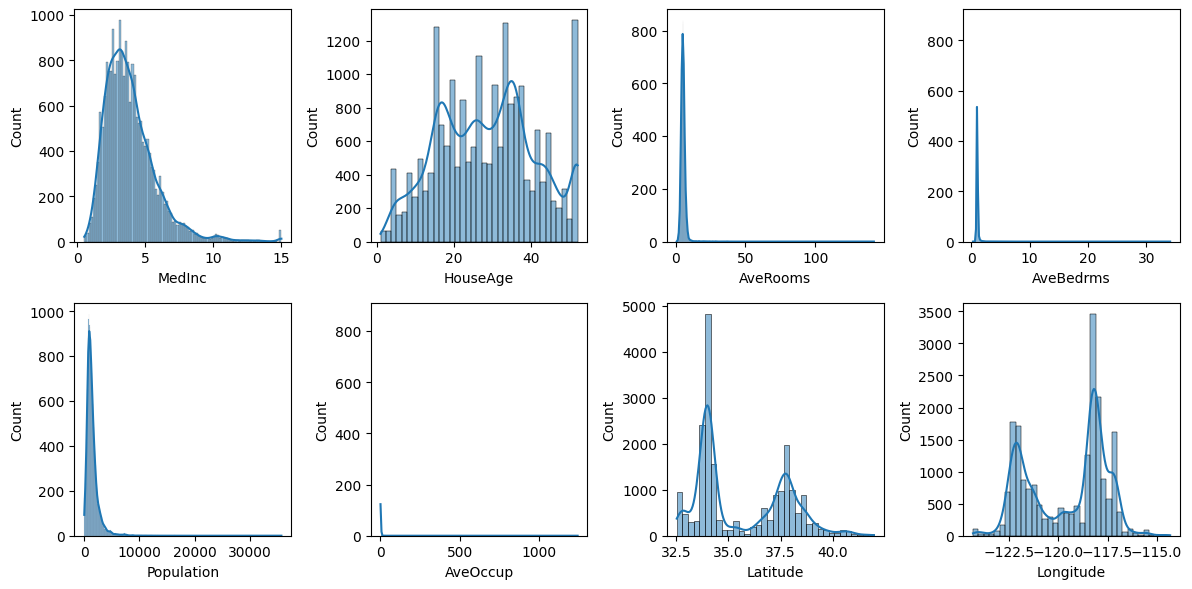

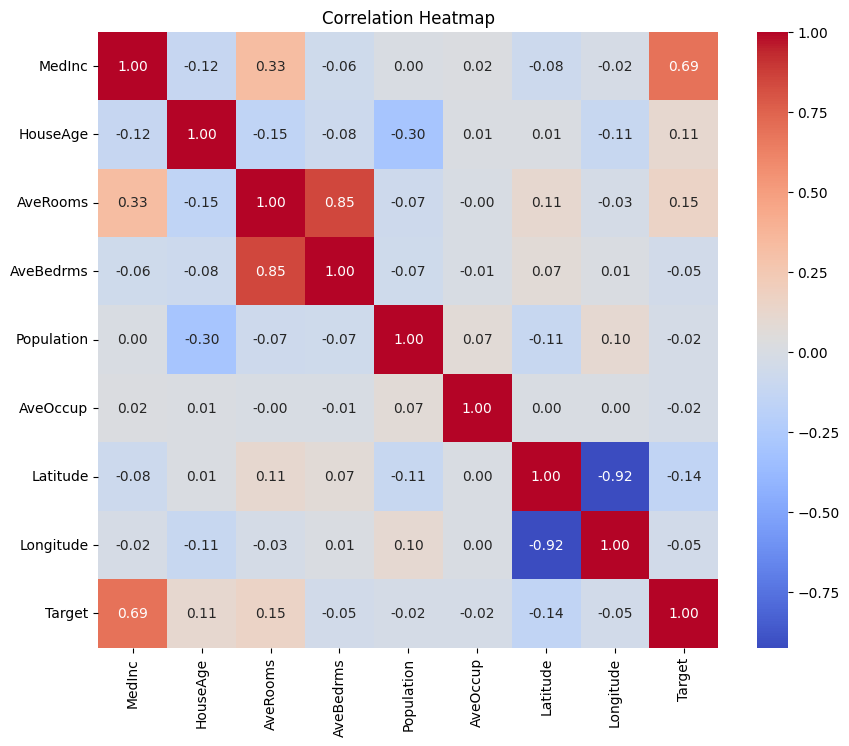

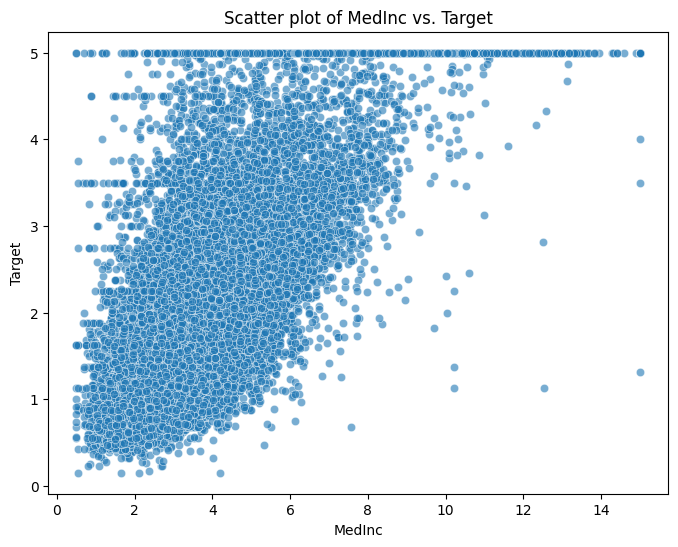

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names

# Create a Pandas DataFrame for easier data manipulation
df = pd.DataFrame(data=np.c_[X, y], columns=feature_names + ['Target'])

# Display a sample of rows
print("Sample rows of the dataset:")
print(df.head())

# Display fundamental statistics
print("\nFundamental Statistics:")
print(df.describe())

# Data Visualization
# Histograms of the features
plt.figure(figsize=(12, 6))
plt.title("Histograms of Features")
for i, feature in enumerate(feature_names):
    plt.subplot(2, 4, i+1)
    sns.histplot(df[feature], kde=True)
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
plt.title("Correlation Heatmap")
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Scatter plot of a selected feature against the target
selected_feature = 'MedInc'
plt.figure(figsize=(8, 6))
plt.title(f"Scatter plot of {selected_feature} vs. Target")
sns.scatterplot(data=df, x=selected_feature, y='Target', alpha=0.6)
plt.xlabel(selected_feature)
plt.ylabel('Target')
plt.show()


**Prompt**:
> Use a neural network model to make predictions on the California Housing dataset by following these steps:  
1) Load the data from sklearn. Use 20% of data as the testing dataset.  
2) Build a neural network model using Keras with the following structure:  
- Layer 1 with 64 output features, followed by the ReLU activation function.  
- Layer 2 with 64 output features, followed by the ReLU activation function.  
- Layer 3 with 1 output feature.

> 3) Show the mean absolute error of the predictions on the testing dataset.  
4) Build a linear regression model. Calculate and display the mean absolute error of the predictions on the testing dataset.


In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Step 1: Load the data and split it into training and testing sets
data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Step 3: Train the neural network model and calculate the mean absolute error on the testing dataset
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Make predictions on the testing dataset
y_pred_nn = model.predict(X_test)

# Calculate mean absolute error for neural network
mae_nn = mean_absolute_error(y_test, y_pred_nn)
print("Mean Absolute Error (Neural Network):", mae_nn)

# Step 4: Build the linear regression model and calculate the mean absolute error on the testing dataset
linear_model = LinearRegression()

# Train the linear regression model
linear_model.fit(X_train, y_train)

# Make predictions on the testing dataset
y_pred_linear = linear_model.predict(X_test)

# Calculate mean absolute error for linear regression
mae_linear = mean_absolute_error(y_test, y_pred_linear)
print("Mean Absolute Error (Linear Regression):", mae_linear)


129/129 [==============================] - 0s 2ms/step
Mean Absolute Error (Neural Network): 0.5021847765566513
Mean Absolute Error (Linear Regression): 0.533200130495698


Practice:

- Compare the linear regression and neural network
- Interpret both models

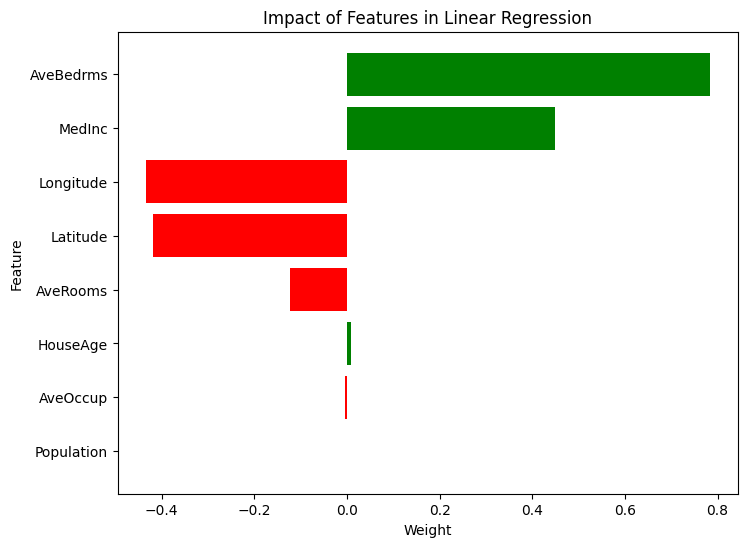

In [18]:
feature_weights = linear_model.coef_

# Step 2: Create a plot of the weights, arranged by the absolute values of weights
sorted_indices = np.argsort(np.abs(feature_weights))
sorted_feature_names = [data.feature_names[i] for i in sorted_indices]
sorted_weights = feature_weights[sorted_indices]

plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_feature_names)), sorted_weights, color=['r' if w < 0 else 'g' for w in sorted_weights])
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.title('Impact of Features in Linear Regression')
plt.show()

157/157 [==============================] - 0s 2ms/step
Intercept 2.3540758091632745
Prediction_local [0.81408263]
Right: 1.0764439
Explanation for the first instance:
[('MedInc <= 2.57', -1.0492630432717112), ('AveOccup > 3.28', -0.7294466849304428), ('AveRooms <= 4.45', 0.26967987945322675), ('18.00 < HouseAge <= 29.00', -0.08820385202643614), ('-121.81 < Longitude <= -118.51', 0.05724051878322493)]


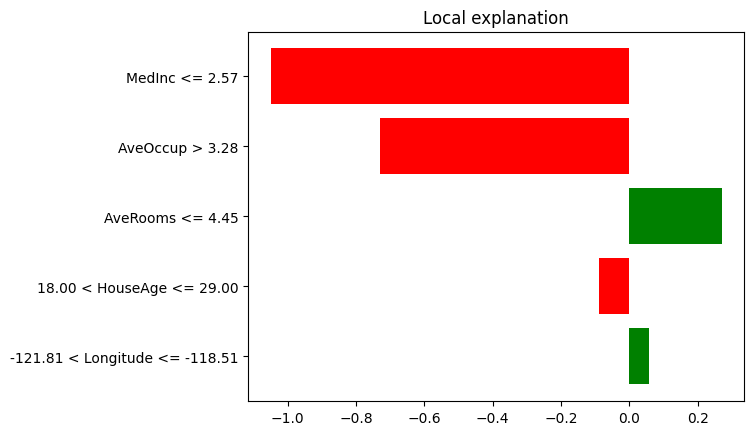

In [19]:
from lime import lime_tabular

# Using LIME to interpret the first test instance
explainer = lime_tabular.LimeTabularExplainer(X_train,
                                             feature_names=data.feature_names,
                                             class_names=['Target'],
                                             verbose=True,
                                             mode='regression')

# Get the first test instance and its corresponding prediction
instance = X_test[0]
prediction = model.predict(instance.reshape(1, -1))[0]

# Generate an explanation using LIME
exp = explainer.explain_instance(instance, model.predict, num_features=5)

# Print the explanation
print('Explanation for the first instance:')
print(exp.as_list())

fig = exp.as_pyplot_figure()

516/516 [==============================] - 1s 3ms/step


131064/131064 [==============================] - 228s 2ms/step


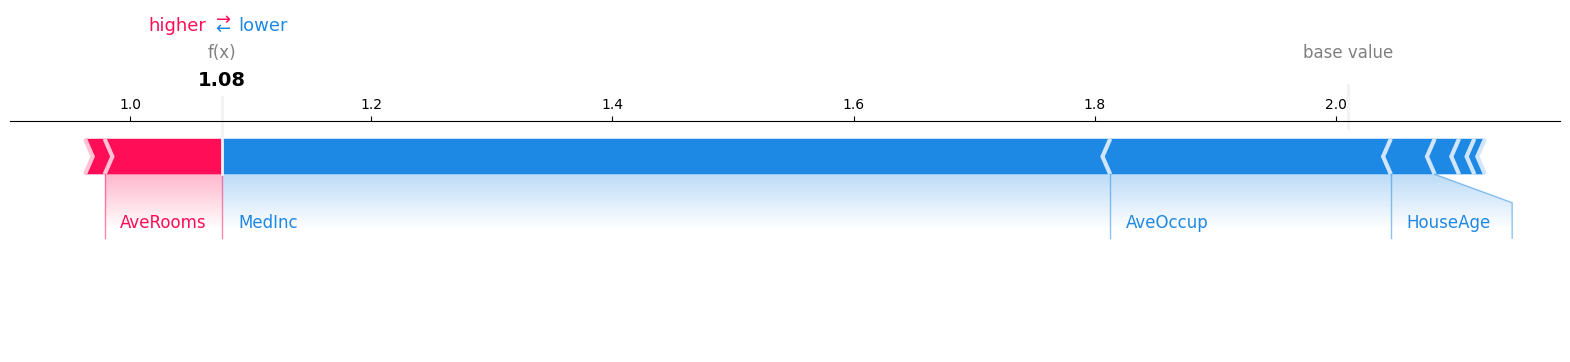

In [20]:
import shap
import numpy as np

# Function to predict using the neural network model
def predict_nn(input_data):
    return model.predict(input_data)

# Load JS visualization code to the notebook
shap.initjs()

# Create an explainer object
explainer = shap.KernelExplainer(predict_nn, X_train)

# Get SHAP values for the first instance in the test dataset
shap_values = explainer.shap_values(X_test[0])

# Plot the SHAP values
shap.force_plot(explainer.expected_value[0], shap_values[0], feature_names=data.feature_names, matplotlib=True)

### K-fold Validation

To evaluate our network while we keep adjusting its parameters (such as the number of epochs used for training), we could simply split the data into a training set and a validation set. However, because we have so few data points, the validation set would end up being very small (e.g. about 100 examples). A consequence is that our validation scores may change a lot depending on which data points we choose to use for validation and which we choose for training, i.e. the validation scores may have a high variance with regard to the validation split. This would prevent us from reliably evaluating our model.

The best practice in such situations is to use K-fold cross-validation. It consists of splitting the available data into K partitions (typically K=4 or 5), then instantiating K identical models, and training each one on K-1 partitions while evaluating on the remaining partition. The validation score for the model used would then be the average of the K validation scores obtained.

<center>
<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/Neural_Networks/figures/k-fold_valid.png" width="500">
</center>

**Prompt**:
> I have a neural network as follows:  
{copy the python code here. I use california housing in this example}  
Retrain the neural network model using K-fold validation. Plot the average validation MAE along the number of epochs. Show the mean absolute error of prediction on the testing dataset.

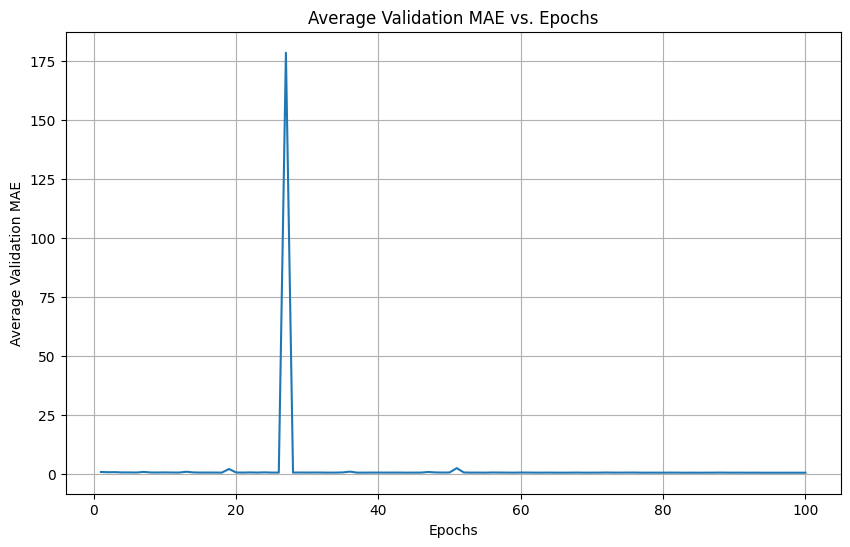

129/129 [==============================] - 0s 2ms/step
Mean Absolute Error (Neural Network): 0.4984561188814899


In [21]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Step 1: Load the data and split it into training and testing sets
data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Step 3: Retrain the neural network model using K-fold validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
all_val_maes = []
for train_index, val_index in kfold.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    history = model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0, validation_data=(X_val_fold, y_val_fold))
    val_mae = history.history['val_loss']
    all_val_maes.append(val_mae)

# Calculate the average validation MAE for each epoch
average_val_maes = np.mean(all_val_maes, axis=0)

# Plot the average validation MAE along the number of epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(average_val_maes) + 1), average_val_maes)
plt.title("Average Validation MAE vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Average Validation MAE")
plt.grid()
plt.show()

# Step 4: Make predictions on the testing dataset
y_pred_nn = model.predict(X_test)

# Calculate mean absolute error for neural network
mae_nn = mean_absolute_error(y_test, y_pred_nn)
print("Mean Absolute Error (Neural Network):", mae_nn)

K-fold cross-validation is a method used to obtain reliable estimations of a model's performance by minimizing the impact of chance through switching the training and testing datasets.

For example, let's consider three models:

- Model 1 is our current model with the following architecture:
```python
# model 1
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',
                       input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
```
- Model 2 has 128 neurons in the first layer, which is a hyperparameter:
```python
# model 2
model = models.Sequential()
model.add(layers.Dense(128, activation='relu',
                       input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
```
- Model 3 has fewer layers than Model 1:
```python
# model 3
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',
                       input_shape=(train_data.shape[1],)))
model.add(layers.Dense(1))
```
We can use K-fold cross-validation to evaluate the performance of these three models.

It's important to note that once we choose a model, its parameters need to be trained using the entire training dataset before the model is used.


## Classifying Movie Reviews

As an example of binary classification, also known as two-class classification, we will classify movie reviews as either positive or negative based on the textual content of the reviews.

The IMDB dataset is a commonly used dataset for machine learning tutorials related to text and language. It contains 50,000 movie reviews, with 25,000 in the training set and 25,000 in the testing set, collected from IMDB. Each review in the dataset has been labeled with a binary sentiment: positive (1) or negative (0). The following code loads the IMDB data:
```python
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
```
The raw data contains the text of each movie review. Keras provides a built-in function that replaces the raw text in both the training and testing datasets with integers based on the frequency of each word's occurrence in the entire training dataset. For instance the integer "3" encodes the 3rd most frequent word in the data.

The resulting `train_data` is a numpy array containing 25,000 lists, and only the `num_words=10000` most frequent words are kept. Each list may have a different length due to different review lengths.

**Prompt**:
> Explain the IMDb data in Keras. Show me the first movie review.

In [22]:
from keras.datasets import imdb

## The code provided by ChatGPT imports those two packages
## which are not used. The pad_sequences causes error.
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences

# Load the IMDb dataset
num_words = 10000  # Number of most frequent words to keep in the vocabulary
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Get the word index dictionary from the dataset
word_index = imdb.get_word_index()

# Reverse the word index to get a dictionary mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decode the first movie review (index 0) into text
first_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

# Print the first movie review and its sentiment label
print("First Movie Review:")
print(first_review)
print("Sentiment Label (1=Positive, 0=Negative):", train_labels[0])


1641221/1641221 [==============================] - 1s 1us/step
First Movie Review:
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but the

In [23]:
# Print an example of the reverse word index
print("Example of dictionary:\n", dict(sorted(reverse_word_index.items())[10:15]))

Example of dictionary:
 {11: 'this', 12: 'that', 13: 'was', 14: 'as', 15: 'for'}


**Prompt**:
> 1) Classify movie reviews using the IMDb data in Keras.   
2) Build a neural network with the following architecture:
- Layer 1 with 16 output features, followed by the ReLU activation function.  
- Layer 2 with 16 output features, followed by the ReLU activation function.  
- Layer 3 with 1 output feature.

> 3) During model fitting, use the first 10,000 reviews as the validation dataset within the training dataset.  
4) Arrange two plots side by side, with the first plot displaying training and validation losses, and the second plot showing training and validation accuracy. Both plots should have epochs on the X-axis and exclude the first epoch.

Epoch 1/20
30/30 [==============================] - 7s 58ms/step - loss: 0.5278 - accuracy: 0.7835 - val_loss: 0.4161 - val_accuracy: 0.8502
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3327 - accuracy: 0.8964 - val_loss: 0.3327 - val_accuracy: 0.8723
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2478 - accuracy: 0.9191 - val_loss: 0.2921 - val_accuracy: 0.8835
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2020 - accuracy: 0.9318 - val_loss: 0.2794 - val_accuracy: 0.8875
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1651 - accuracy: 0.9467 - val_loss: 0.2798 - val_accuracy: 0.8861
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1395 - accuracy: 0.9552 - val_loss: 0.3088 - val_accuracy: 0.8761
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1205 - accuracy: 0.9617 - val_loss: 0.3592 - val_accuracy: 0.8693
Epoch 8/20
30

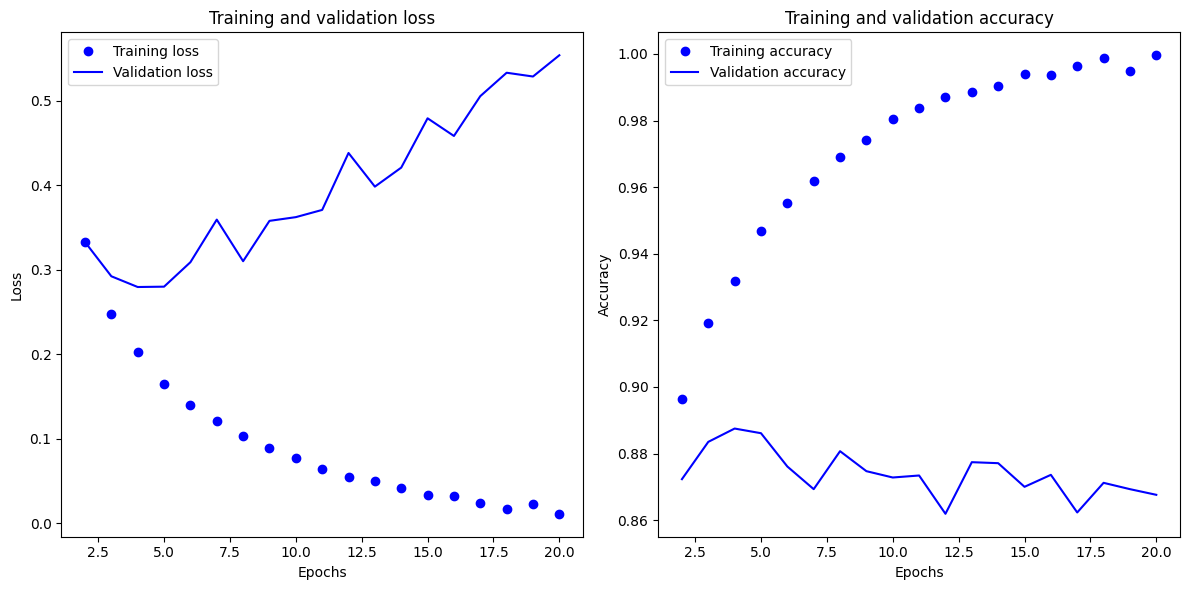

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load IMDb dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Preprocess the data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

# Build the neural network
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Prepare the validation dataset
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train the model and monitor the validation loss and accuracy
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# Extract training and validation losses and accuracies
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

epochs = range(2, len(loss_values) + 1)

# Create subplots for losses and accuracies
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot training and validation losses
ax1.plot(epochs, loss_values[1:], 'bo', label='Training loss')
ax1.plot(epochs, val_loss_values[1:], 'b', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training and validation accuracies
ax2.plot(epochs, accuracy_values[1:], 'bo', label='Training accuracy')
ax2.plot(epochs, val_accuracy_values[1:], 'b', label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()


The above figures indicate that during the training process, the training loss is expected to decrease and the training accuracy to increase with each epoch as the model parameters are optimized. However, it is common for the validation loss and accuracy to initially improve, but then start to worsen as the optimization continues. This is a sign of overfitting, where the model becomes too focused on the training data and fails to generalize well to new data that it has not seen before.

At the start of training, there is a positive correlation between optimization and generalization. As the model learns relevant patterns from the training data, both the training and validation losses decrease. During this stage, the model is said to be underfit, as it still has room for improvement in modeling the patterns in the training data.

However, after a certain number of iterations on the training data, the model begins to overfit. The validation loss stops improving and begins to increase, even as the training loss continues to decrease. This indicates that the model has started to learn patterns that are specific to the training data, but are irrelevant or misleading for new data.

**Prompt**:
> Show me the test accuracy

In [2]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test Accuracy:", test_accuracy)

782/782 [==============================] - 2s 3ms/step - loss: 0.6012 - accuracy: 0.8573
Test Accuracy: 0.8572800159454346


**Prompt**:
> What is the purpose of the vectorize_sequences function?

The reason we cannot simply feed lists of integers into a neural network is because integers have an inherent order, whereas the words represented by the integers do not. For instance, the 3rd and 4th most frequent words in a text are 'this' and 'that', respectively. It would be inappropriate to convey to the neural network that 'that' is greater than 'this', as this order has no real meaning in the context of natural language processing.

Before we delve into the details of word embedding in natural language processing, let's start by vectorizing a sentence using the `vectorize_sequences` function. For example, the short phrase 'this was' would be represented as [11,13] in training data. The `vectorize_sequences` function will represent this phrase as follows:
\begin{align}
\underbrace{(0,\ldots,\overbrace{1}^{\text{11th}},0,\ldots,0,\overbrace{1}^{\text{13th}},0,\ldots,0)}_{10000}
\end{align}

**Prompt**:
> Show me how to improve the model

### Network Sizes

One simple approach to prevent overfitting is to reduce the size of the model by decreasing the number of learnable parameters. This is often referred to as the model's *capacity* in deep learning. Intuitively, a model with more parameters has greater memorization capacity, which allows it to learn the features in the training samples more easily, but may lack generalization power, leading to overfitting.

There is a compromise to be found between too much capacity and not enough capacity. Unfortunately, there is no magical formula to determine the right number of parameters for a given problem.

Beside the original model with `build_model(size=16)`, we built a smaler model with `build_model(size=4)` and a larger model with `build_model(size=512)`. The figure below shows a comparison of their validation losses and accuracy with the original model.

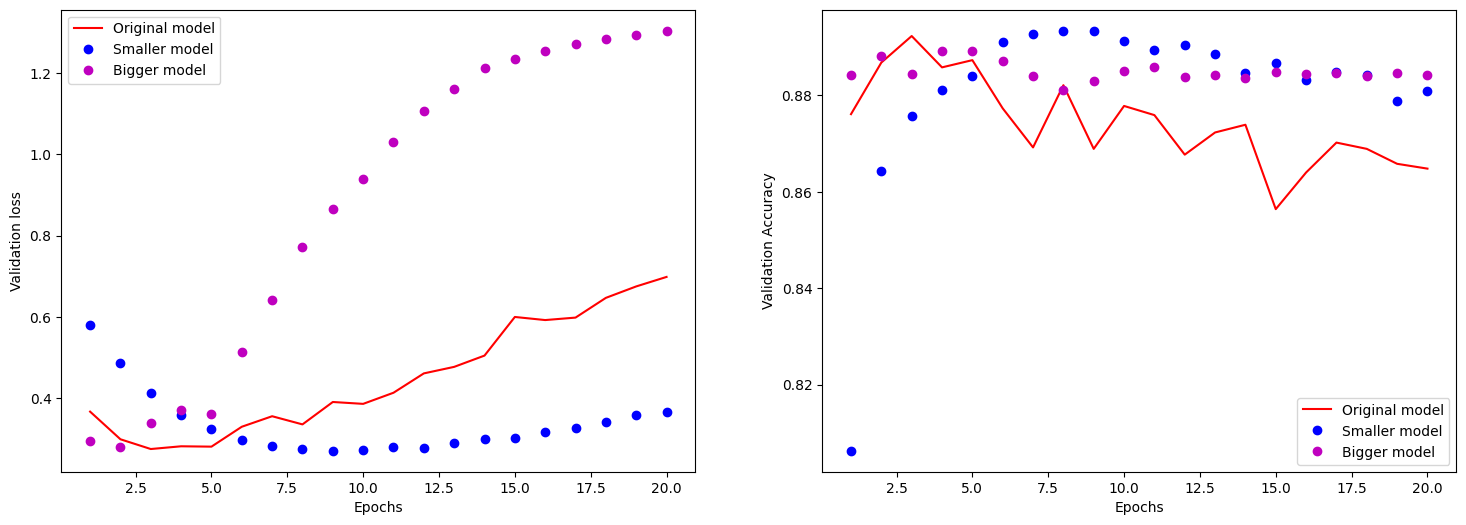

In [3]:
import pickle
import matplotlib.pyplot as plt
from urllib.request import urlopen
%matplotlib inline
base = ("https://raw.githubusercontent.com/ming-zhao/ming-zhao.github.io"
        "/master/AIML_for_Business/Neural_Networks/")

original_val_loss = pickle.loads(urlopen(base + "data/history_imdb_1_16.pkl").read())['val_loss']
smaller_model_val_loss = pickle.loads(urlopen(base + "data/history_imdb_1_4.pkl").read())['val_loss']
bigger_model_val_loss = pickle.loads(urlopen(base + "data/history_imdb_1_512.pkl").read())['val_loss']

original_val_acc = pickle.loads(urlopen(base + "data/history_imdb_1_16.pkl").read())['val_acc']
smaller_model_val_acc = pickle.loads(urlopen(base + "data/history_imdb_1_4.pkl").read())['val_acc']
bigger_model_val_acc = pickle.loads(urlopen(base + "data/history_imdb_1_512.pkl").read())['val_acc']

epochs = range(1, len(original_val_loss)+1)

fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)
plt.plot(epochs, original_val_loss, 'r', label='Original model')
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.plot(epochs, bigger_model_val_loss, 'mo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(epochs, original_val_acc, 'r', label='Original model')
plt.plot(epochs, smaller_model_val_acc, 'bo', label='Smaller model')
plt.plot(epochs, bigger_model_val_acc, 'mo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

The smaller model starts overfitting later than the original model and the bigger network starts overfitting almost immediately.

The primary metric for evaluating a model's performance is the loss, which measures the difference between the predicted and actual values. A lower loss indicates that the model is better at making accurate predictions. While accuracy is also an important metric, it may not always provide a complete picture of a model's performance, especially if the data is imbalanced.

### Weight Regularization

While keeping the network size constant, one common way to address overfitting is to apply weight regularization techniques, which encourage the weights of the network to take on small values. This helps to prevent the network from being too sensitive to the training data and improves its ability to generalize to new data.

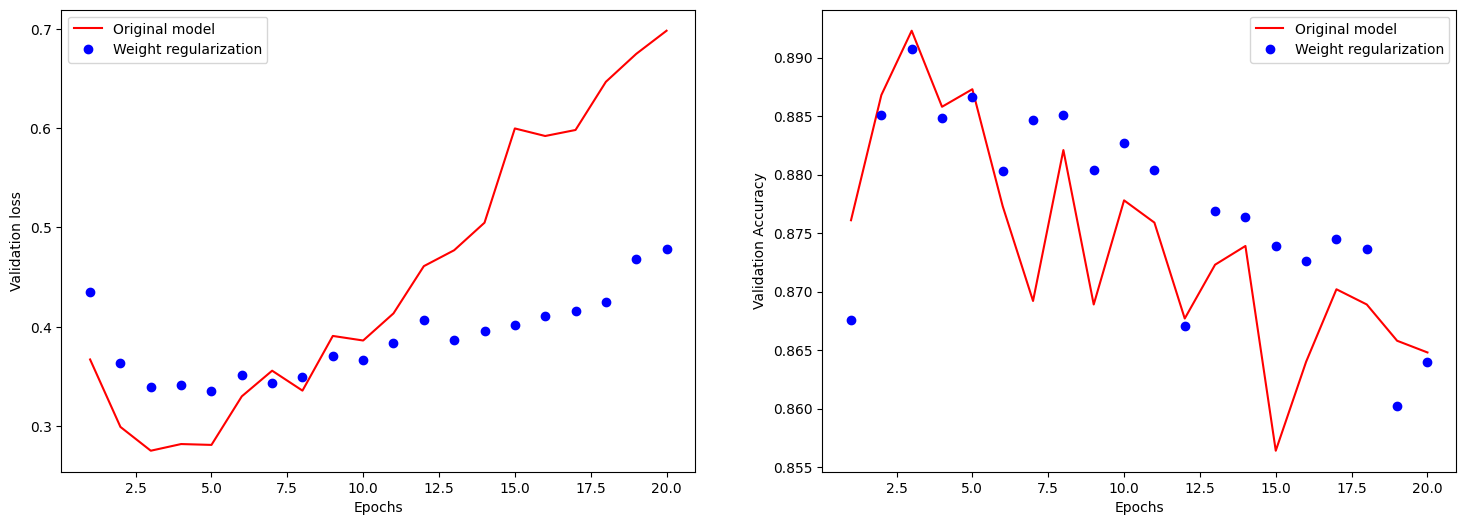

In [4]:
import pickle
import matplotlib.pyplot as plt
from urllib.request import urlopen
%matplotlib inline
base = ("https://raw.githubusercontent.com/ming-zhao/ming-zhao.github.io"
        "/master/AIML_for_Business/Neural_Networks/")

original_val_loss = pickle.loads(urlopen(base + "data/history_imdb_1_16.pkl").read())['val_loss']
l2_model_val_loss = pickle.loads(urlopen(base + "data/history_imdb_1_l2.pkl").read())['val_loss']

original_val_acc = pickle.loads(urlopen(base + "data/history_imdb_1_16.pkl").read())['val_acc']
l2_model_val_acc = pickle.loads(urlopen(base + "data/history_imdb_1_l2.pkl").read())['val_acc']

epochs = range(1, len(original_val_loss)+1)

fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)
plt.plot(epochs, original_val_loss, 'r', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='Weight regularization')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(epochs, original_val_acc, 'r', label='Original model')
plt.plot(epochs, l2_model_val_acc, 'bo', label='Weight regularization')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

### Dropout

One of the most common and effective methods for regularization in neural networks is dropout. This technique involves randomly "dropping out" (i.e., setting to zero) a number of output features in a layer during training. For instance, if a layer would normally produce the output vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training, applying dropout would yield a vector with some of its entries set to zero, such as [0, 0.5, 1.3, 0, 1.1]. The dropout rate is the fraction of output features that are zeroed out, and it is typically set between 0.2 and 0.5.

It's important to note that regularization techniques, like Dropout and weight regularization, are applied only during training and are turned off during testing (prediction).

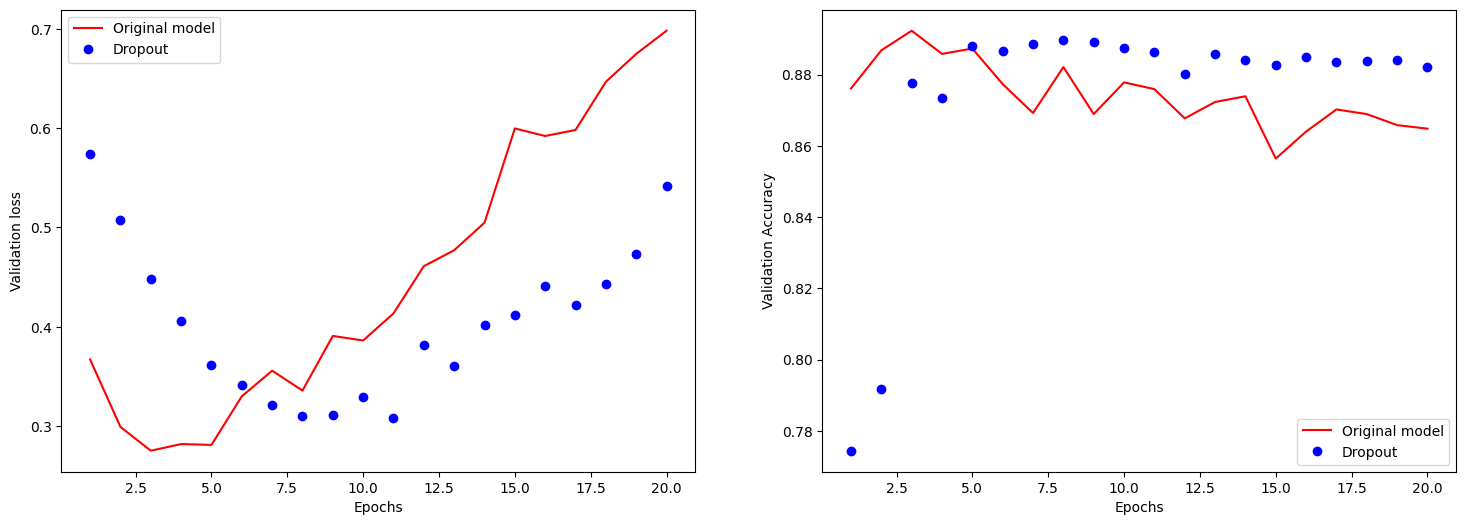

In [5]:
import pickle
import matplotlib.pyplot as plt
from urllib.request import urlopen
%matplotlib inline
base = ("https://raw.githubusercontent.com/ming-zhao/ming-zhao.github.io"
        "/master/AIML_for_Business/Neural_Networks/")

original_val_loss = pickle.loads(urlopen(base + "data/history_imdb_1_16.pkl").read())['val_loss']
dropout_model_val_loss = pickle.loads(urlopen(base + "data/history_imdb_1_dropout.pkl").read())['val_loss']

original_val_acc = pickle.loads(urlopen(base + "data/history_imdb_1_16.pkl").read())['val_acc']
dropout_model_val_acc = pickle.loads(urlopen(base + "data/history_imdb_1_dropout.pkl").read())['val_acc']

epochs = range(1, len(original_val_loss)+1)

fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)
plt.plot(epochs, original_val_loss, 'r', label='Original model')
plt.plot(epochs, dropout_model_val_loss, 'bo', label='Dropout')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(epochs, original_val_acc, 'r', label='Original model')
plt.plot(epochs, dropout_model_val_acc, 'bo', label='Dropout')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

## Classifying Newswires

In this section, we will focus on building a network that classifies Reuters newswires into 46 different topics.

As we have multiple classes to classify, this problem is a multiclass classification problem. Specifically, this problem is an instance of single-label, multiclass classification because each news article belongs to only one topic. However, if each news article could belong to multiple topics, we would be dealing with a multilabel, multiclass classification problem.

**Prompt**:
> Explain the Reuters data in Keras. Show me the first news.

In [6]:
from keras.datasets import reuters

# Load the Reuters dataset
num_words = 10000  # Number of most frequent words to keep in the vocabulary
(train_data, train_labels), _ = reuters.load_data(num_words=num_words)

# Get the word index dictionary from the dataset
word_index = reuters.get_word_index()

# Reverse the word index to get a dictionary mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decode the first news article (index 0) into text
first_news_article = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

# Print the first news article and its label
print("First News Article:")
print(first_news_article)
print("Label (Topic Index):", train_labels[0])


550378/550378 [==============================] - 1s 1us/step
First News Article:
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
Label (Topic Index): 3


**Prompt**:
> 1) Classify news article using the Reuters data in Keras.   
2) Build a neural network with the following architecture:
- Layer 1 with 64 output features, followed by the ReLU activation function.  
- Layer 2 with 64 output features, followed by the ReLU activation function.  
- Layer 3 is the final layer.

> 3) During model fitting, use the first 1000 news as the validation dataset within the training dataset.  
4) Arrange two plots side by side, with the first plot displaying training and validation losses, and the second plot showing training and validation accuracy. Both plots should have epochs on the X-axis and exclude the first epoch.

Epoch 1/20
16/16 [==============================] - 2s 30ms/step - loss: 2.7036 - accuracy: 0.4945 - val_loss: 1.8183 - val_accuracy: 0.6160
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 1.5334 - accuracy: 0.6789 - val_loss: 1.3996 - val_accuracy: 0.6780
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.1849 - accuracy: 0.7407 - val_loss: 1.1998 - val_accuracy: 0.7380
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.9737 - accuracy: 0.7868 - val_loss: 1.0938 - val_accuracy: 0.7650
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.8108 - accuracy: 0.8234 - val_loss: 1.0271 - val_accuracy: 0.7730
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.6803 - accuracy: 0.8538 - val_loss: 0.9801 - val_accuracy: 0.7790
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5724 - accuracy: 0.8777 - val_loss: 0.9240 - val_accuracy: 0.7950
Epoch 8/20
16

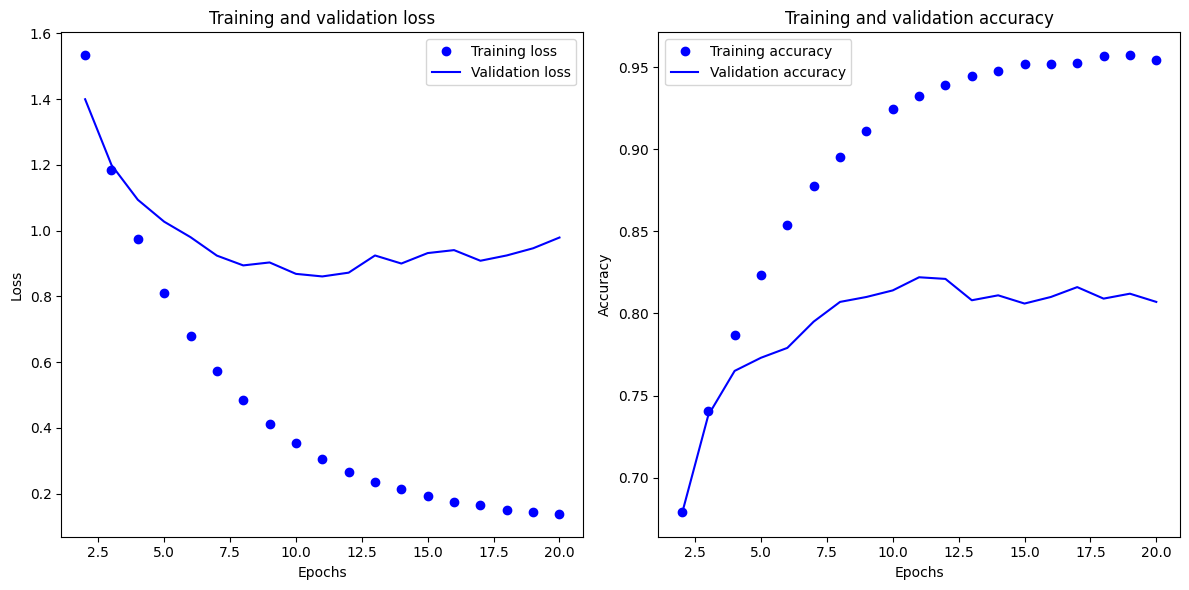

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load Reuters dataset
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# Preprocess the data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.array(train_labels)
y_test = np.array(test_labels)

# Build the neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

# Compile the model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Prepare the validation dataset
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

# Train the model and monitor the validation loss and accuracy
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# Extract training and validation losses and accuracies
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

epochs = range(2, len(loss_values) + 1)

# Create subplots for losses and accuracies
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot training and validation losses
ax1.plot(epochs, loss_values[1:], 'bo', label='Training loss')
ax1.plot(epochs, val_loss_values[1:], 'b', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training and validation accuracies
ax2.plot(epochs, accuracy_values[1:], 'bo', label='Training accuracy')
ax2.plot(epochs, val_accuracy_values[1:], 'b', label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()


There are a few details to note about this neural network architecture:

- The network ends with a Dense layer of size 46. This means that for each input sample, the network will output a 46-dimensional vector, where each entry in the vector corresponds to a different output class.

- The last layer uses a softmax activation function. This means that the network will output a probability distribution over the 46 different output classes for every input sample. Specifically, the network will produce a 46-dimensional output vector, where `output[i]` is the probability that the sample belongs to class $i$. The probabilities for all 46 classes will sum to 1.

- Think about what could happen if the intermediate layers are significantly less than 46-dimensional, for example, 4-dimensional.
```python
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))